In [1]:
%matplotlib inline

import numpy as np
from ghostpy.Invariants import FieldLine as fl
from ghostpy.algorithms import common as algc
from ghostpy.algorithms import convert as algx
from ghostpy.algorithms import DipoleField as dpf
from ghostpy.data import VtkData as vdt
import scipy.interpolate as interp

In [2]:
lams = np.linspace(start=0, stop=np.pi/2, num=50, endpoint=False)

In [3]:
data = vdt.VtkData(filename="./unit_tests/test_data/lfm_dipole_test_quad.vts", vector="B")

In [4]:
def L(lam, re=3):
    return re/(np.cos(lam)**2)

In [69]:
B = []
Ls = []
ds = np.linspace(start=2.0, stop=30, num=2000)
for L in ds:
    dipole_L = L
    Ls.append(dipole_L)
    loc = algc.sphere_to_cart(r=dipole_L, lam=0, phi=0)
    B.append(algc.mag(dpf.dipole_field(x=loc[0], y=loc[1], z=loc[2])))
        
B = np.array(B, dtype=np.float_)

In [71]:
x = B
y = Ls

x2 = np.diff(x)

it = interp.interp1d(x,y, kind='cubic')
it2 = interp.interp1d(y[:-1], x2, kind='cubic')

print (it2(3))
print (it2(4))
print (it2(5))

# print y[:-1]

-16.190086264
-5.13455227962
-2.1060481566


In [80]:
new_x = np.logspace(start=1, stop=3, num=10)

In [95]:
new_x = np.flipud(new_x)
new_pts = it(new_x)
new_x2 = np.linspace(2.1,20.5)
new_pts2 = it2(new_x2)

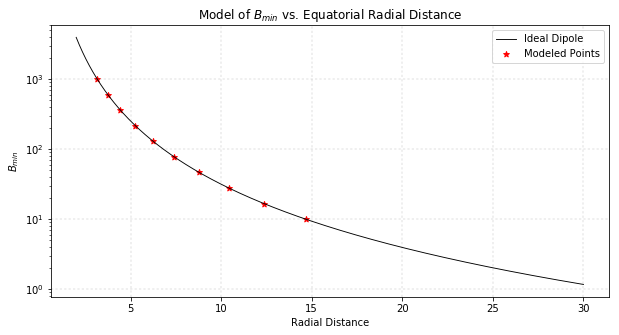

In [96]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.semilogy(Ls, B, 'k-', lw=0.9 ,label="Ideal Dipole")
ax.set_title("Model of $B_{min}$ vs. Equatorial Radial Distance")
ax.set_xlabel("Radial Distance")
ax.set_ylabel("$B_{min}$")
plt.grid(b=True, which='major', color='grey', linewidth=0.25, linestyle=':')
ax.scatter(new_pts, new_x, marker="*", color='r', label="Modeled Points")
plt.legend()
plt.show()
fig.savefig("/Volumes/8TB Seagate/PhD Data/profiles/BDModel.pdf")

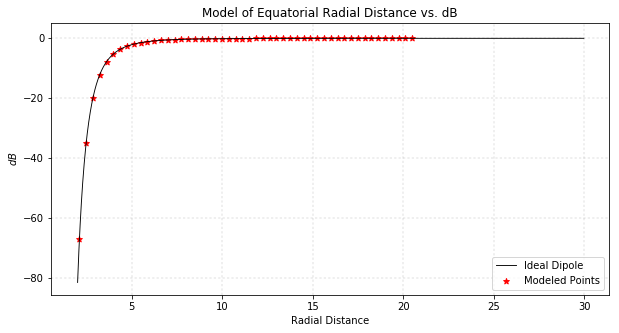

In [99]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(y[:-1], x2, 'k-', lw=0.9 ,label="Ideal Dipole")
ax.set_title("Model of Equatorial Radial Distance vs. dB")
ax.set_xlabel("Radial Distance")
ax.set_ylabel("$dB$")
plt.grid(b=True, which='major', color='grey', linewidth=0.25, linestyle=':')
ax.scatter(new_x2, new_pts2, marker="*", color='r', label="Modeled Points")
plt.legend()
plt.show()
fig.savefig("/Volumes/8TB Seagate/PhD Data/profiles/BDModel.pdf")